In [1]:
!pip install torchsummary
!pip install googletrans
!pip install deep-translator
!python -m spacy download it_core_news_sm
!pip install translate
!pip install Unidecode

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=e9086882ecce98b4be1b75cd56784a5e327fcc0e7b085ee20659947291e015e7
  Stored in directory: /root/.cache/pip/wheels/cd/15/16/9d24ab82fc6498f8150e1b478c1891e7139afc854f00b8af5d
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14

In [2]:
import os
import numpy as np
import pandas as pd
import re
import csv
from bs4 import BeautifulSoup
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import codecs
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler, random_split
from torchsummary import summary
from transformers import BertTokenizer
from transformers import BertModel
from transformers import AdamW, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
from sklearn import metrics
import random
import time
import spacy
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import pyLDAvis
import pyLDAvis.sklearn
from nltk.probability import FreqDist
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim
import plotly.graph_objects as go
import plotly.express as px
import itertools
import warnings
import urllib.request
from PIL import Image
import requests
from io import BytesIO
from IPython.display import SVG
from deep_translator import GoogleTranslator
import googletrans
from googletrans import Translator
from unidecode import unidecode
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe','script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'["\|\n|\r|\n\r]+',' ', stripped_text)
    return stripped_text

def remove_html(text):
    text = re.sub(r'https?:\/\/\S*', ' ', str(text), flags=re.MULTILINE)
    return text

def remove_special_characters(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+',' ',text)
    return text

def remove_stopwords_1(text):
    
    stop_file_path = '/kaggle/input/offline-libs/stop-words-2018.7.23/stop-words-2018.7.23/stop_words/stop-words/italian.txt'   
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        stopword_list = list(frozenset(stop_set))
        stopword_list.append('rt')
        stopword_list.append('cè')
        stopword_list.append('via')
        stopword_list.append('d')
    
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)        
    return filtered_text

def remove_stopwords_2(text):
    
    stop_file_path = '/kaggle/input/stopword-lists-for-19-languages/italianST.txt' 
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        stopword_list = list(frozenset(stop_set))
    
    tokenizer = ToktokTokenizer()
 
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)      
    return filtered_text

def remove_accents(text):
    processed_text = unidecode(text)
    return processed_text

def remove_mentions(text):
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", ' ', text)
    processed_text = ' '.join(processed_text.split())
    return processed_text

def preprocessing_text(text_arr):
    preprocessed_text = []
    idx = 0
    for text in text_arr:
        text = remove_html(text)
        text = remove_html_tags(text)
        text = remove_mentions(text)
        text = remove_special_characters(text) 
        text = text.lower() 
        text = remove_stopwords_1(text) 
        text = remove_stopwords_2(text)
        text = remove_accents(text)
        preprocessed_text.append(text)
        idx+=1
    print('Data Preprocessing finished.')
    return preprocessed_text

In [4]:
data_20 = '/kaggle/input/tweets-20-lrr/tweets-20-lrr.csv'
data_21 = '/kaggle/input/tweets-21-lrr/tweets-21-lrr.csv'
data_22 = '/kaggle/input/tweets-22-lrr/tweets-22-lrr.csv'
#data_22 = '/kaggle/input/dataset-tweets-22-relevant/tweets-texts-preds-1-binary-indexed.csv'
data_hash_20 = '/kaggle/input/italian-tweets-full/italian-tweets-2o-full.csv'
data_hash_21 = '/kaggle/input/italian-tweets-full/italian-tweets-21-full.csv'
data_hash_22 = '/kaggle/input/italian-tweets-full/italian-tweets-full-22.csv'

df_20 = pd.read_csv(data_20, index_col=0, encoding='ISO 8859-1')
df_21 = pd.read_csv(data_21, index_col=0, encoding='ISO 8859-1')
df_22 = pd.read_csv(data_22, index_col=0, encoding='ISO 8859-1')
df_hash_20 = pd.read_csv(data_hash_20, index_col=0, encoding='ISO 8859-1')
df_hash_21 = pd.read_csv(data_hash_21, index_col=0, encoding='ISO 8859-1')
df_hash_22 = pd.read_csv(data_hash_22, index_col=0, encoding='ISO 8859-1')

text_20 = df_hash_20.loc[:,"Column2"].values
text_21 = df_hash_21.loc[:,"Column2"].values
text_22 = df_hash_22.loc[:,"Column2"].values
#text_22 = df_22.loc[:,"text"].values
text_hash_20 = df_hash_20.loc[:,"hash"].values
text_hash_21 = df_hash_21.loc[:,"hash"].values
text_hash_22 = df_hash_22.loc[:,"hash"].values
text_attach_type_20 = df_hash_20.loc[:,"attach-type"].values
text_attach_type_21 = df_hash_21.loc[:,"attach-type"].values
text_attach_type_22 = df_hash_22.loc[:,"attach-type"].values
text_attach_20 = df_hash_20.loc[:,"attach"].values
text_attach_21 = df_hash_21.loc[:,"attach"].values
text_attach_22 = df_hash_22.loc[:,"attach"].values

In [5]:
print(df_hash_20.loc[:,"Column2"].str.len().mean())
print(df_hash_21.loc[:,"Column2"].str.len().mean())
print(df_hash_22.loc[:,"Column2"].str.len().mean())

161.86904182879377
165.22778675282714
165.91014506723215


In [6]:
print(df_hash_20.loc[:,"Column2"].str.split().str.len().mean())
print(df_hash_21.loc[:,"Column2"].str.split().str.len().mean())
print(df_hash_22.loc[:,"Column2"].str.split().str.len().mean())

22.520306420233464
23.218416801292406
23.243587642777964


In [7]:
text_20_cleaned = preprocessing_text(text_20)
text_21_cleaned = preprocessing_text(text_21)
text_22_cleaned = preprocessing_text(text_22)

Data Preprocessing finished.
Data Preprocessing finished.
Data Preprocessing finished.


In [8]:
print("raw extraction tweet numbers without any cleaning performed:")
print("\n2020: " + str(len(text_20_cleaned)))
print("2021: " + str(len(text_21_cleaned)))
print("2022: " + str(len(text_22_cleaned)))

raw extraction tweet numbers without any cleaning performed:

2020: 8224
2021: 9285
2022: 103745


In [9]:
text_attach_20 = [x for x in text_attach_20 if str(x) != 'nan']
text_attach_21 = [x for x in text_attach_21 if str(x) != 'nan']
text_attach_22 = [x for x in text_attach_22 if str(x) != 'nan']

In [10]:
text_hash_20 = [x for x in text_hash_20 if str(x) != 'nan']
text_hash_21 = [x for x in text_hash_21 if str(x) != 'nan']
text_hash_22 = [x for x in text_hash_22 if str(x) != 'nan']

In [11]:
text_hash_20 = preprocessing_text(text_hash_20)
text_hash_21 = preprocessing_text(text_hash_21)
text_hash_22 = preprocessing_text(text_hash_22)

Data Preprocessing finished.
Data Preprocessing finished.
Data Preprocessing finished.


In [12]:
df_text_20_cleaned = pd.DataFrame({"cleaned_text": text_20_cleaned})
df_text_21_cleaned = pd.DataFrame({"cleaned_text": text_21_cleaned})
df_text_22_cleaned = pd.DataFrame({"cleaned_text": text_22_cleaned})

df_text_hash_20_cleaned = pd.DataFrame({"cleaned_text": text_hash_20})
df_text_hash_21_cleaned = pd.DataFrame({"cleaned_text": text_hash_21})
df_text_hash_22_cleaned = pd.DataFrame({"cleaned_text": text_hash_22})

df_text_attach_20_cleaned = pd.DataFrame({"photo": text_attach_20})
df_text_attach_21_cleaned = pd.DataFrame({"photo": text_attach_21})
df_text_attach_22_cleaned = pd.DataFrame({"photo": text_attach_22})

df_text_20_cleaned.cleaned_text.replace('', np.nan, inplace=True)
df_text_21_cleaned.cleaned_text.replace('', np.nan, inplace=True)
df_text_22_cleaned.cleaned_text.replace('', np.nan, inplace=True)

df_text_hash_20_cleaned.cleaned_text.replace('', np.nan, inplace=True)
df_text_hash_21_cleaned.cleaned_text.replace('', np.nan, inplace=True)
df_text_hash_22_cleaned.cleaned_text.replace('', np.nan, inplace=True)

df_text_attach_20_cleaned.photo.replace('', np.nan, inplace=True)
df_text_attach_21_cleaned.photo.replace('', np.nan, inplace=True)
df_text_attach_22_cleaned.photo.replace('', np.nan, inplace=True)

df_text_20_cleaned = df_text_20_cleaned.drop_duplicates().dropna().reset_index(drop=True)
df_text_21_cleaned = df_text_21_cleaned.drop_duplicates().dropna().reset_index(drop=True)
df_text_22_cleaned = df_text_22_cleaned.drop_duplicates().dropna().reset_index(drop=True)

df_text_hash_20_cleaned = df_text_hash_20_cleaned.dropna().reset_index(drop=True)
df_text_hash_21_cleaned = df_text_hash_21_cleaned.dropna().reset_index(drop=True)
df_text_hash_22_cleaned = df_text_hash_22_cleaned.dropna().reset_index(drop=True)

df_text_attach_20_cleaned = df_text_attach_20_cleaned.dropna().reset_index(drop=True)
df_text_attach_21_cleaned = df_text_attach_21_cleaned.dropna().reset_index(drop=True)
df_text_attach_22_cleaned = df_text_attach_22_cleaned.dropna().reset_index(drop=True)

words_text_20_cleaned = df_text_20_cleaned.cleaned_text.str.split().str.len()
words_text_20_cleaned['count'] = df_text_20_cleaned.cleaned_text.str.split().str.len()

words_text_21_cleaned = df_text_21_cleaned.cleaned_text.str.split().str.len()
words_text_21_cleaned['count'] = df_text_21_cleaned.cleaned_text.str.split().str.len()

words_text_22_cleaned = df_text_22_cleaned.cleaned_text.str.split().str.len()
words_text_22_cleaned['count'] = df_text_22_cleaned.cleaned_text.str.split().str.len()

words_text_hash_20_cleaned = df_text_hash_20_cleaned.cleaned_text.str.split().str.len()
words_text_hash_20_cleaned['count'] = df_text_hash_20_cleaned.cleaned_text.str.split().str.len()

words_text_hash_21_cleaned = df_text_hash_21_cleaned.cleaned_text.str.split().str.len()
words_text_hash_21_cleaned['count'] = df_text_hash_21_cleaned.cleaned_text.str.split().str.len()

words_text_hash_22_cleaned = df_text_hash_22_cleaned.cleaned_text.str.split().str.len()
words_text_hash_22_cleaned['count'] = df_text_hash_22_cleaned.cleaned_text.str.split().str.len()


In [13]:
to_translate_0 = "hay|crops|corn|cattle|livestock|crop|farmers|wheat|pasture|irrigation|grass|producer|agriculture|grazing|cotton|yield|yields|soybean|pasture|ranchers|trees|producers|ponds|growth|growing"
to_translate_1 = "boat|ski|business|fishing|park|ramps|power|businesses|fireworks|golf|hydropower|lawn|prices"
to_translate_2 = "fire|burn|fires|wildfires|burning|burned|wildfire"
to_translate_3 = "leaves|brown|plants|leaves|wildlife|fish|soil|lawn|garden|deer|browning|birds|bird|tree|trees"
to_translate_4 = "restrictions|ban|conservation|mandatory|voluntary|declaration|governor|communities|prohibited|conserve"
to_translate_5 = "quality|dust|food|health|allergies|smoke|homeowners|mental|stress"
to_translate_6 = "restrictions|river|conservation|lake|irrigation|wells|ponds|quality|reservoir|pond"
translation_0 = GoogleTranslator(source='auto', target='it').translate(to_translate_0)
translation_1 = GoogleTranslator(source='auto', target='it').translate(to_translate_1)
translation_2 = GoogleTranslator(source='auto', target='it').translate(to_translate_2)
translation_3 = GoogleTranslator(source='auto', target='it').translate(to_translate_3)
translation_4 = GoogleTranslator(source='auto', target='it').translate(to_translate_4)
translation_5 = GoogleTranslator(source='auto', target='it').translate(to_translate_5)
translation_6 = GoogleTranslator(source='auto', target='it').translate(to_translate_6)

In [14]:
count_0 = df_text_22_cleaned.cleaned_text.str.count(translation_0).sum()
count_1 = df_text_22_cleaned.cleaned_text.str.count(translation_1).sum()
count_2 = df_text_22_cleaned.cleaned_text.str.count(translation_2).sum()
count_3 = df_text_22_cleaned.cleaned_text.str.count(translation_3).sum()
count_4 = df_text_22_cleaned.cleaned_text.str.count(translation_4).sum()
count_5 = df_text_22_cleaned.cleaned_text.str.count(translation_5).sum()
count_6 = df_text_22_cleaned.cleaned_text.str.count(translation_6).sum()
print(count_0)
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)

8246
10195
2741
2591
580
1392
4673


In [15]:
print(df_text_20_cleaned.cleaned_text.str.len().mean())
print(df_text_21_cleaned.cleaned_text.str.len().mean())
print(df_text_22_cleaned.cleaned_text.str.len().mean())

93.9523947330343
95.50501874470916
91.61375680109526


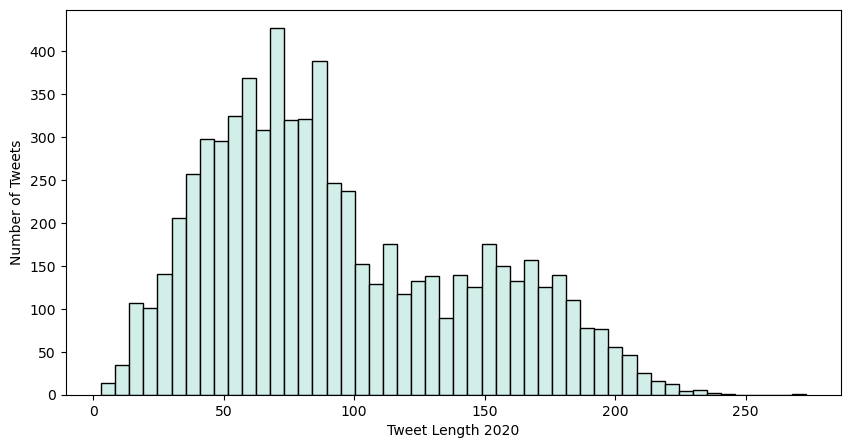

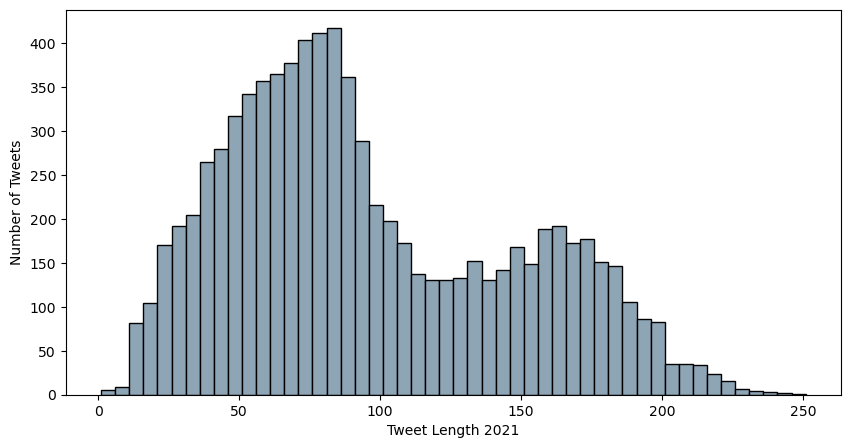

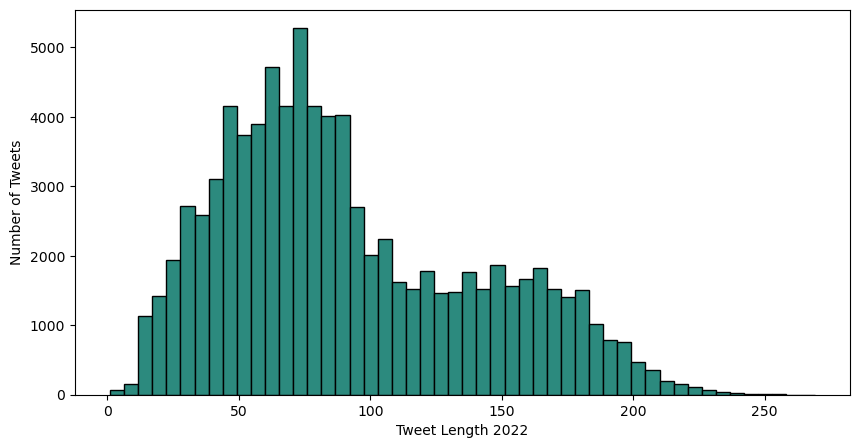

In [16]:
plt.figure(figsize = (10,5))
plt.hist(df_text_20_cleaned.cleaned_text.str.len(), color='#d2eee9', edgecolor='black', bins=50)
plt.xlabel('Tweet Length 2020')
plt.ylabel('Number of Tweets')
plt.show()
plt.figure(figsize = (10,5))
plt.hist(df_text_21_cleaned.cleaned_text.str.len(), color='#8ea5b6', edgecolor='black', bins=50)
plt.xlabel('Tweet Length 2021')
plt.ylabel('Number of Tweets')
plt.show()
plt.figure(figsize = (10,5))
plt.hist(df_text_22_cleaned.cleaned_text.str.len(), color='#2c8a7e', edgecolor='black', bins=50)
plt.xlabel('Tweet Length 2022')
plt.ylabel('Number of Tweets')
plt.show()

In [17]:
print("resulting unique samples after cleaning:\n")
print("cleaned tweets overall (2020): " + str(len(df_text_20_cleaned)))
print("cleaned tweets overall (2021): " + str(len(df_text_21_cleaned)))
print("cleaned tweets overall (2022): " + str(len(df_text_22_cleaned)))

print("\nhashtags overall (2020): " + str(len(df_text_hash_20_cleaned)))
print("hashtags overall (2020): " + str(len(df_text_hash_21_cleaned)))
print("hashtags overall (2020): " + str(len(df_text_hash_22_cleaned)))

print("\nattachments overall (2020): " + str(len(df_text_attach_20_cleaned)))
print("attachments overall (2021): " + str(len(df_text_attach_21_cleaned)))
print("attachments overall (2022): " + str(len(df_text_attach_22_cleaned)))

resulting unique samples after cleaning:

cleaned tweets overall (2020): 6911
cleaned tweets overall (2021): 8269
cleaned tweets overall (2022): 84729

hashtags overall (2020): 2497
hashtags overall (2020): 2730
hashtags overall (2020): 36261

attachments overall (2020): 1443
attachments overall (2021): 1581
attachments overall (2022): 19295


In [18]:
all_words_20 = df_text_20_cleaned.cleaned_text.str.split()
all_words_21 = df_text_21_cleaned.cleaned_text.str.split()
all_words_22 = df_text_22_cleaned.cleaned_text.str.split()
all_words_hash_20 = df_text_hash_20_cleaned.cleaned_text.str.split()
all_words_hash_21 = df_text_hash_21_cleaned.cleaned_text.str.split()
all_words_hash_22 = df_text_hash_22_cleaned.cleaned_text.str.split()


In [19]:
y_20 = np.concatenate(all_words_20)
y_21 = np.concatenate(all_words_21)
y_22 = np.concatenate(all_words_22)
y_hash_20 = np.concatenate(all_words_hash_20)
y_hash_21 = np.concatenate(all_words_hash_21)
y_hash_22 = np.concatenate(all_words_hash_22)

In [20]:
Counter_20 = Counter(y_20)
Counter_21 = Counter(y_21)
Counter_22 = Counter(y_22)
Counter_hash_20 = Counter(y_hash_20)
Counter_hash_21 = Counter(y_hash_21)
Counter_hash_22 = Counter(y_hash_22)

In [21]:
arr_20 = []
arr_21 = []
arr_22 = []

for let in text_attach_20:
    let = re.sub(r"[\[\]]",'',let)
    arr_20.append(let)

for let in text_attach_21:
    let = re.sub(r"[\[\]]",'',let)
    arr_21.append(let)

for let in text_attach_22:
    let = re.sub(r"[\[\]]",'',let)
    arr_22.append(let)


In [22]:
Counter_photo_20 = Counter(arr_20)
Counter_photo_21 = Counter(arr_21)
Counter_photo_22 = Counter(arr_22)

In [23]:
photos_common_20 = Counter_photo_20.most_common(20)
photos_common_21 = Counter_photo_21.most_common(20)
photos_common_22 = Counter_photo_22.most_common(20)

In [24]:
print(photos_common_20)
print(photos_common_21)
print(photos_common_22)

[("'https://pbs.twimg.com/media/EjP7MS_UcAEaGxu.jpg'", 2), ("'https://pbs.twimg.com/media/EdHG1J8X0AE-E5X.jpg'", 2), ("'https://pbs.twimg.com/media/EcvOuj8XkAI5SGf.jpg'", 2), ("'https://pbs.twimg.com/media/EcwLo_eXgAEXhwt.jpg'", 2), ("'https://pbs.twimg.com/media/EatGz0PXQAcDJop.jpg'", 2), ("'https://pbs.twimg.com/media/Eas5FnNXQAYh6wD.jpg'", 2), ("'https://pbs.twimg.com/media/EWRPzmhX0AYeyy0.jpg'", 2), ("'https://pbs.twimg.com/media/EWBukzfWsAIzSIE.jpg'", 2), ("'https://pbs.twimg.com/media/ESHjH4qWsAAUN7x.jpg'", 2), ("'https://pbs.twimg.com/media/ERO127fUUAAvyzW.jpg'", 2), ("'https://pbs.twimg.com/tweet_video_thumb/Eqg8x9MXEAALxyu.jpg'", 1), ("'https://pbs.twimg.com/media/Ep6wyQNXcAkGfod.jpg'", 1), ("'https://pbs.twimg.com/media/EqcO_DWXcAIw53W.jpg', 'https://pbs.twimg.com/media/EqcPCRlXMAAaHgI.jpg', 'https://pbs.twimg.com/media/EqcPF6wXUAEbRsT.png', 'https://pbs.twimg.com/media/EqcPXc0W4BQC-ED.png'", 1), ("'https://pbs.twimg.com/media/EqZZHEDXUAA_4GS.png'", 1), ("'https://pbs.twimg.c

In [25]:
most_occur_20 = Counter_20.most_common(10)
most_occur_21 = Counter_21.most_common(10)
most_occur_22 = Counter_22.most_common(10)
most_occur_hash_20 = Counter_hash_20.most_common(20)
most_occur_hash_21 = Counter_hash_21.most_common(20)
most_occur_hash_22 = Counter_hash_22.most_common(20)

In [26]:
df_most_common_20 = pd.DataFrame(most_occur_20)
df_most_common_21 = pd.DataFrame(most_occur_21)
df_most_common_22 = pd.DataFrame(most_occur_22)
df_most_common_hash_20 = pd.DataFrame(most_occur_hash_20)
df_most_common_hash_21 = pd.DataFrame(most_occur_hash_21)
df_most_common_hash_22 = pd.DataFrame(most_occur_hash_22)

('siccita', 'acqua', 'pioggia', 'italia', 'allarme', 'caldo', 'incendi', 'rischio', 'agricoltura', 'clima')
['drought', 'water', 'rain', 'italy', 'heat', 'alarm', 'fire', 'risk', 'agriculture', 'climate']
('siccita', 'acqua', 'caldo', 'pioggia', 'incendi', 'italia', 'agricoltura', 'causa', 'clima', 'rischio')
['drought', 'water', 'hot', 'rain', 'fire', 'italy', 'agriculture', 'cause', 'climate', 'risk']
('siccita', 'acqua', 'emergenza', 'italia', 'caldo', 'guerra', 'crisi', 'pioggia', 'problema', 'allarme')
['drought', 'water', 'emergency', 'italy', 'heat', 'war', 'crisis', 'rain', 'problem', 'alarm']


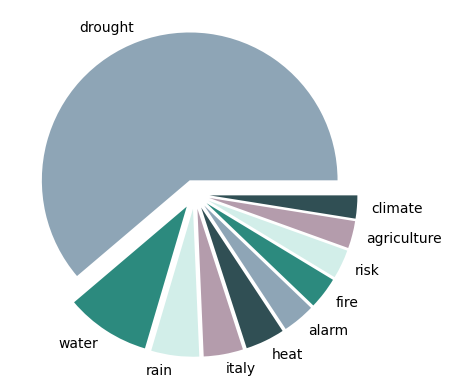

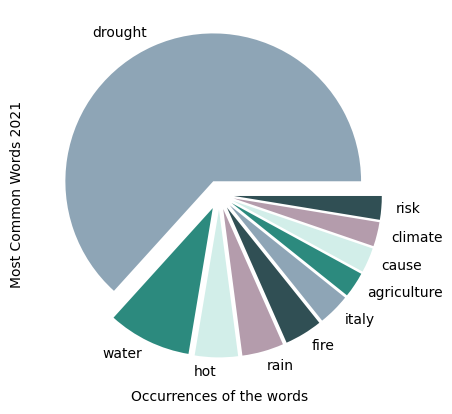

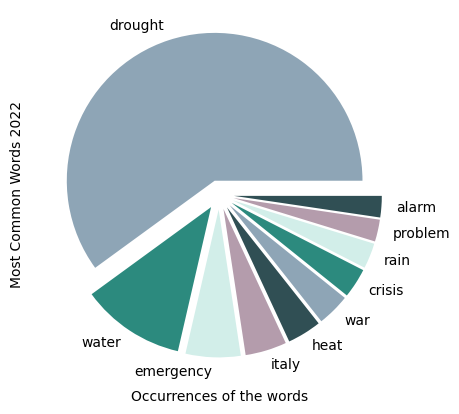

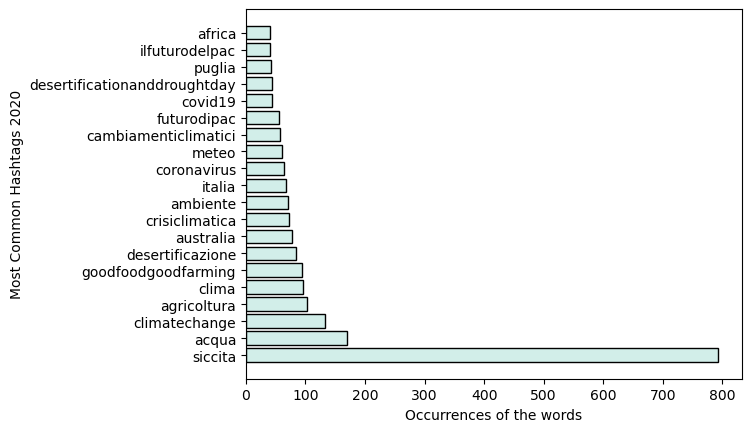

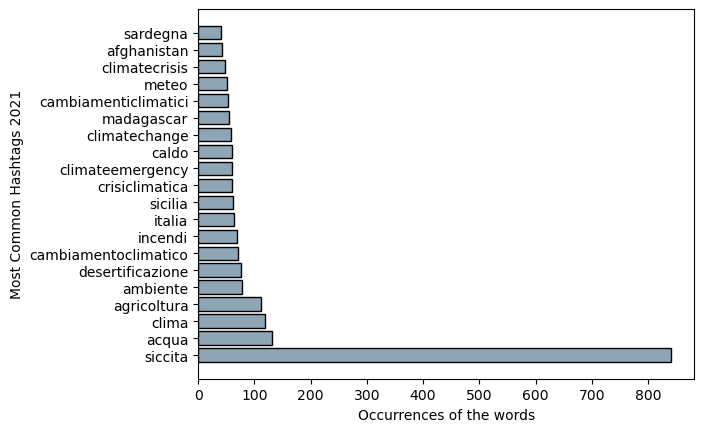

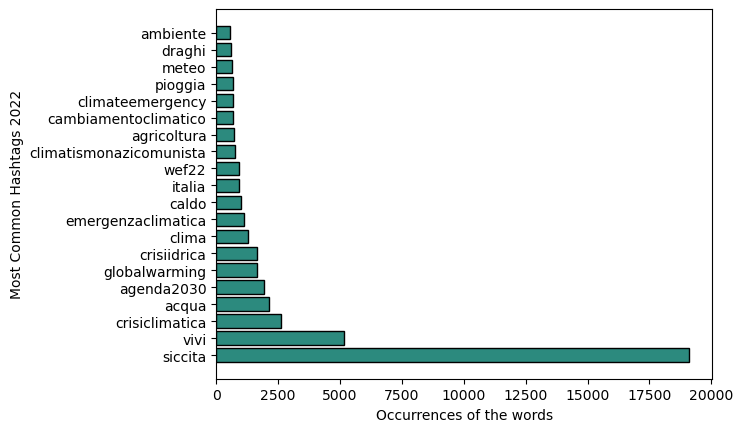

In [27]:
words_20 = list(zip(*most_occur_20))[0]
count_20 = list(zip(*most_occur_20))[1]
x_pos_20 = np.arange(len(words_20)) 

words_21 = list(zip(*most_occur_21))[0]
count_21 = list(zip(*most_occur_21))[1]
x_pos_21 = np.arange(len(words_21)) 

words_22 = list(zip(*most_occur_22))[0]
count_22 = list(zip(*most_occur_22))[1]
x_pos_22 = np.arange(len(words_22))

words_hash_20 = list(zip(*most_occur_hash_20))[0]
count_hash_20 = list(zip(*most_occur_hash_20))[1]
x_pos_hash_20 = np.arange(len(words_hash_20))

words_hash_21 = list(zip(*most_occur_hash_21))[0]
count_hash_21 = list(zip(*most_occur_hash_21))[1]
x_pos_hash_21 = np.arange(len(words_hash_21))

words_hash_22 = list(zip(*most_occur_hash_22))[0]
count_hash_22 = list(zip(*most_occur_hash_22))[1]
x_pos_hash_22 = np.arange(len(words_hash_22))

myexplode = [0.1]*10
#myexplode[0] = 0.2

mycolors = ['#8ea5b6', '#2c8a7e', '#d2eee9', '#b49cac', '#304f54']

print(words_20)
words_20 = GoogleTranslator(source='auto', target='en').translate(' '.join(words_20))
words_20 = words_20.split()
print(words_20)

print(words_21)
words_21 = GoogleTranslator(source='auto', target='en').translate(' '.join(words_21))
words_21 = words_21.split()
print(words_21)

print(words_22)
words_22 = GoogleTranslator(source='auto', target='en').translate(' '.join(words_22))
words_22 = words_22.split()
print(words_22)


plt.pie(count_20, labels=words_20, explode=myexplode, colors=mycolors)

plt.show()
plt.pie(count_21, labels=words_21, explode=myexplode, colors=mycolors)
plt.xlabel('Occurrences of the words')
plt.ylabel('Most Common Words 2021')
plt.show()
plt.pie(count_22, labels=words_22, explode=myexplode, colors=mycolors)
plt.xlabel('Occurrences of the words')
plt.ylabel('Most Common Words 2022')
plt.show()
plt.barh(words_hash_20, count_hash_20, align='center', color='#d2eee9', edgecolor='black')
plt.xlabel('Occurrences of the words')
plt.ylabel('Most Common Hashtags 2020')
plt.show()
plt.barh(words_hash_21, count_hash_21, align='center', color='#8ea5b6', edgecolor='black')
plt.xlabel('Occurrences of the words')
plt.ylabel('Most Common Hashtags 2021')
plt.show()
plt.barh(words_hash_22, count_hash_22, align='center', color='#2c8a7e', edgecolor='black')
plt.xlabel('Occurrences of the words')
plt.ylabel('Most Common Hashtags 2022')
plt.show()

In [28]:
words_20

['drought',
 'water',
 'rain',
 'italy',
 'heat',
 'alarm',
 'fire',
 'risk',
 'agriculture',
 'climate']

In [29]:
lt_20 = ' '.join(words_20)
lt_21 = ' '.join(words_21)
lt_22 = ' '.join(words_22)
lt_hash_20 = ' '.join(words_hash_20)
lt_hash_21 = ' '.join(words_hash_21)
lt_hash_22 = ' '.join(words_hash_22)

In [30]:
lt_20_en = GoogleTranslator(source='auto', target='en').translate(lt_20)
lt_21_en = GoogleTranslator(source='auto', target='en').translate(lt_21)
lt_22_en = GoogleTranslator(source='auto', target='en').translate(lt_22)
lt_hash_20_en = GoogleTranslator(source='auto', target='en').translate(lt_hash_20)
lt_hash_21_en = GoogleTranslator(source='auto', target='en').translate(lt_hash_21)
lt_hash_22_en = GoogleTranslator(source='auto', target='en').translate(lt_hash_22)

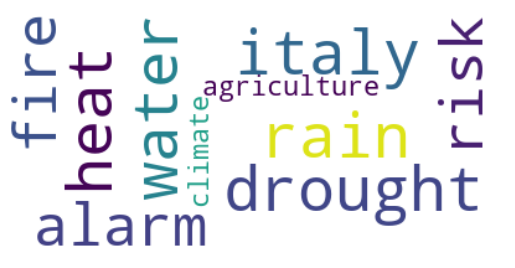

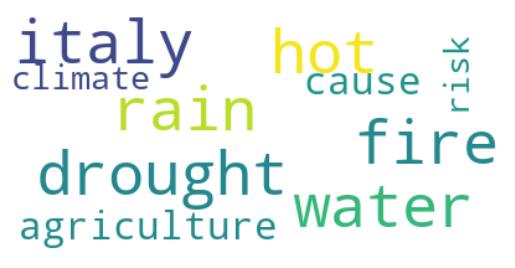

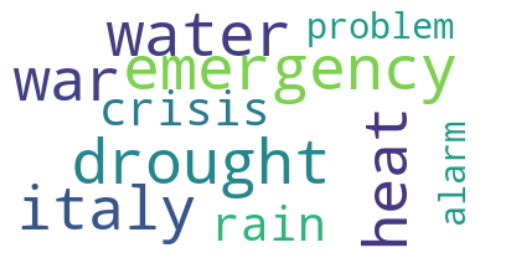

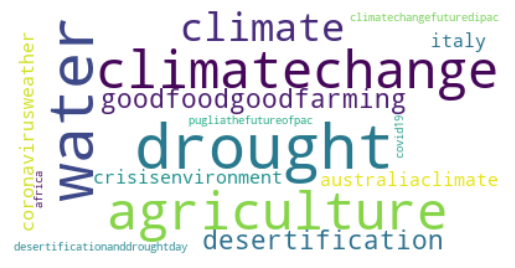

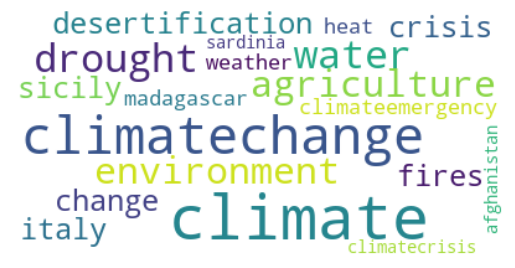

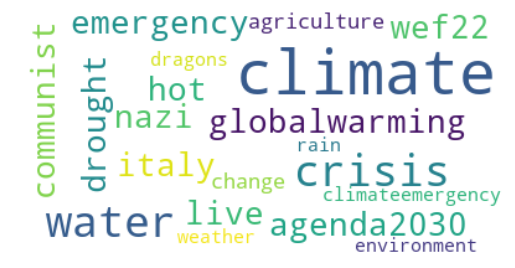

In [31]:
wordcloud_20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_20)
plt.figure()
plt.imshow(wordcloud_20, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_21 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_21)
plt.figure()
plt.imshow(wordcloud_21, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_22 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_22)
plt.figure()
plt.imshow(wordcloud_22, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_hash_20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_hash_20_en)
plt.figure()
plt.imshow(wordcloud_hash_20, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_hash_21 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_hash_21_en)
plt.figure()
plt.imshow(wordcloud_hash_21, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_hash_22 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(lt_hash_22_en)
plt.figure()
plt.imshow(wordcloud_hash_22, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
print(words_text_20_cleaned['count'].values.mean())
print(words_text_21_cleaned['count'].values.mean())
print(words_text_22_cleaned['count'].values.mean())

11.629286644479814
11.882089732736727
11.502838461447674


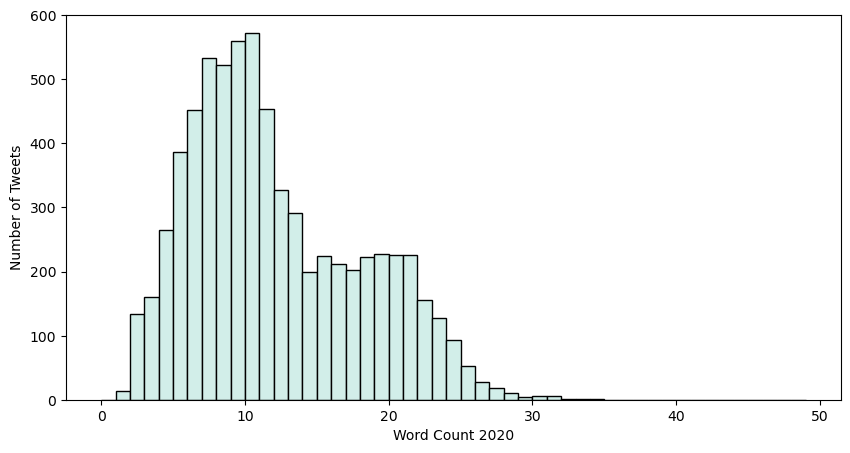

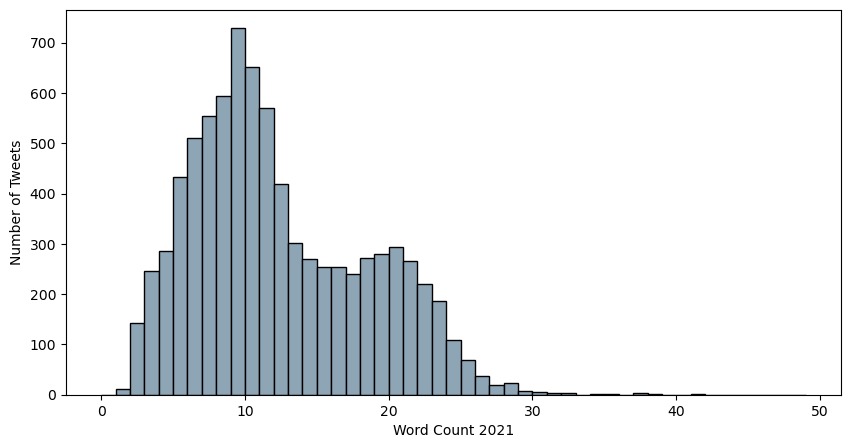

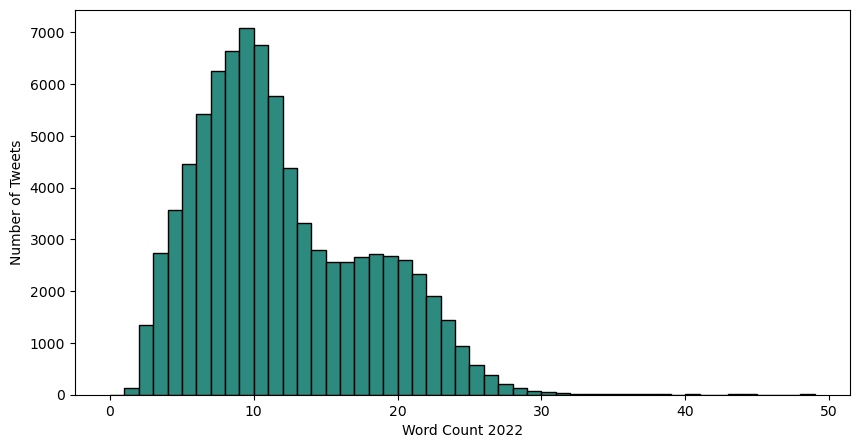

In [33]:
plt.figure(figsize = (10,5))
(n, bins, patches) = plt.hist(words_text_20_cleaned['count'].values, color='#d2eee9',edgecolor='black',bins = range(50),linewidth=1)
plt.xlabel('Word Count 2020')
plt.ylabel('Number of Tweets')
plt.show()

plt.figure(figsize = (10,5))
(n, bins, patches) = plt.hist(words_text_21_cleaned['count'].values, color='#8ea5b6', edgecolor='black',bins = range(50),linewidth=1)
plt.xlabel('Word Count 2021')
plt.ylabel('Number of Tweets')
plt.show()

plt.figure(figsize = (10,5))
(n, bins, patches) = plt.hist(words_text_22_cleaned['count'].values, color='#2c8a7e', edgecolor='black',bins = range(50),linewidth=1)
plt.xlabel('Word Count 2022')
plt.ylabel('Number of Tweets')
plt.show()

In [34]:
total_words_20 = [word for tokens in all_words_20 for word in tokens]
tweet_lengths_20 = [len(tokens) for tokens in all_words_20]
vocab_20 = sorted(list(set(total_words_20)))

print('{} words total, with a vocabulary size of {}'.format(len(total_words_20), len(vocab_20)))
print('Max tweet length is {}'.format(max(tweet_lengths_20)))

80370 words total, with a vocabulary size of 16609
Max tweet length is 34


In [35]:
total_words_21 = [word for tokens in all_words_21 for word in tokens]
tweet_lengths_21 = [len(tokens) for tokens in all_words_21]
vocab_21 = sorted(list(set(total_words_21)))

print('{} words total, with a vocabulary size of {}'.format(len(total_words_21), len(vocab_21)))
print('Max tweet length is {}'.format(max(tweet_lengths_21)))

98253 words total, with a vocabulary size of 18702
Max tweet length is 41


In [36]:
total_words_22 = [word for tokens in all_words_22 for word in tokens]
tweet_lengths_22 = [len(tokens) for tokens in all_words_22]
vocab_22 = sorted(list(set(total_words_22)))

print('{} words total, with a vocabulary size of {}'.format(len(total_words_22), len(vocab_22)))
print('Max tweet length is {}'.format(max(tweet_lengths_22)))

974624 words total, with a vocabulary size of 67731
Max tweet length is 52


In [37]:
#iterate through each tweet, then each token in each tweet, and store in one list
flat_words_20 = [item for sublist in all_words_20 for item in sublist]
word_freq_20 = FreqDist(flat_words_20)

flat_words_21 = [item for sublist in all_words_21 for item in sublist]
word_freq_21 = FreqDist(flat_words_21)

flat_words_22 = [item for sublist in all_words_22 for item in sublist]
word_freq_22 = FreqDist(flat_words_22)

#word_freq.most_common(30)

In [38]:
most_common_count_20 = [x[1] for x in word_freq_20.most_common(10)]
most_common_word_20 = [x[0] for x in word_freq_20.most_common(10)]

most_common_count_21 = [x[1] for x in word_freq_21.most_common(10)]
most_common_word_21 = [x[0] for x in word_freq_21.most_common(10)]

most_common_count_22 = [x[1] for x in word_freq_22.most_common(10)]
most_common_word_22 = [x[0] for x in word_freq_22.most_common(10)]


#create dictionary mapping of word count
top_30_dictionary_20 = dict(zip(most_common_word_20, most_common_count_20))
top_30_dictionary_21 = dict(zip(most_common_word_21, most_common_count_21))
top_30_dictionary_22 = dict(zip(most_common_word_22, most_common_count_22))

In [39]:
text_dict_20 = Dictionary(all_words_20)
text_dict_21 = Dictionary(all_words_21)
text_dict_22 = Dictionary(all_words_22)

In [40]:
tweets_bow_20 = [text_dict_20.doc2bow(tweet) for tweet in all_words_20]
tweets_bow_21 = [text_dict_21.doc2bow(tweet) for tweet in all_words_21]
tweets_bow_22 = [text_dict_22.doc2bow(tweet) for tweet in all_words_22]

In [41]:
k = 5
tweets_lda_20 = LdaModel(tweets_bow_20,
                      num_topics = k,
                      id2word = text_dict_20,
                      random_state = 1,
                      passes=10)

tweets_lda_20.show_topics()

[(0,
  '0.069*"siccita" + 0.013*"australia" + 0.008*"desertificazione" + 0.008*"incendi" + 0.007*"giornata" + 0.007*"cammelli" + 0.006*"mondiale" + 0.006*"coronavirus" + 0.005*"fame" + 0.005*"africa"'),
 (1,
  '0.029*"siccita" + 0.004*"vento" + 0.004*"gelo" + 0.004*"pioggia" + 0.003*"comunita" + 0.003*"acqua" + 0.002*"to" + 0.002*"fronteggiare" + 0.002*"5" + 0.002*"basilicata"'),
 (2,
  '0.080*"siccita" + 0.014*"acqua" + 0.011*"allarme" + 0.010*"caldo" + 0.009*"incendi" + 0.008*"italia" + 0.007*"coldiretti" + 0.007*"clima" + 0.006*"temperature" + 0.006*"agricoltura"'),
 (3,
  '0.042*"siccita" + 0.008*"pioggia" + 0.007*"piove" + 0.007*"acqua" + 0.006*"aspettare" + 0.003*"inutile" + 0.003*"piromani" + 0.002*"foto" + 0.002*"dato" + 0.002*"alimentare"'),
 (4,
  '0.060*"siccita" + 0.011*"sicilia" + 0.008*"australia" + 0.008*"acqua" + 0.007*"problema" + 0.007*"sud" + 0.005*"incendi" + 0.005*"pioggia" + 0.005*"crisi" + 0.005*"tempesta"')]

In [42]:
k = 5
tweets_lda_21 = LdaModel(tweets_bow_21,
                      num_topics = k,
                      id2word = text_dict_21,
                      random_state = 1,
                      passes=10)

tweets_lda_21.show_topics()

[(0,
  '0.048*"siccita" + 0.006*"film" + 0.005*"vortice" + 0.005*"polvere" + 0.004*"incendi" + 0.004*"vedevan" + 0.004*"de" + 0.003*"paolo" + 0.003*"video" + 0.003*"gonna"'),
 (1,
  '0.075*"siccita" + 0.013*"caldo" + 0.011*"pioggia" + 0.011*"italia" + 0.008*"incendi" + 0.007*"agricoltura" + 0.006*"acqua" + 0.006*"coldiretti" + 0.006*"sicilia" + 0.006*"estremi"'),
 (2,
  '0.062*"siccita" + 0.015*"pioggia" + 0.014*"acqua" + 0.007*"riscaldamento" + 0.006*"aspettare" + 0.005*"madagascar" + 0.003*"caldo" + 0.003*"globale" + 0.003*"risposta" + 0.003*"paesi"'),
 (3,
  '0.066*"siccita" + 0.018*"acqua" + 0.009*"crisi" + 0.008*"2" + 0.008*"idrico" + 0.006*"idrica" + 0.006*"rischio" + 0.006*"portogallo" + 0.005*"13" + 0.005*"effetti"'),
 (4,
  '0.071*"siccita" + 0.010*"problema" + 0.007*"fame" + 0.006*"deficit" + 0.006*"desertificazione" + 0.005*"sperimentato" + 0.005*"mondiale" + 0.005*"giornata" + 0.005*"seguire" + 0.005*"problemi"')]

In [43]:
k = 5
tweets_lda_22 = LdaModel(tweets_bow_22,
                      num_topics = k,
                      id2word = text_dict_22,
                      random_state = 1,
                      passes=10)

tweets_lda_22.show_topics()

[(0,
  '0.083*"siccita" + 0.010*"africa" + 0.010*"problema" + 0.008*"allarme" + 0.008*"grano" + 0.007*"coldiretti" + 0.006*"sos" + 0.006*"fame" + 0.005*"pioggia" + 0.005*"somalia"'),
 (1,
  '0.042*"guerra" + 0.039*"siccita" + 0.015*"pandemia" + 0.013*"ucraina" + 0.013*"covid" + 0.012*"crisi" + 0.011*"mondiale" + 0.010*"carestia" + 0.009*"draghi" + 0.009*"the"'),
 (2,
  '0.055*"siccita" + 0.013*"acqua" + 0.008*"suolo" + 0.004*"ordinanza" + 0.004*"putin" + 0.004*"malnutrizione" + 0.004*"desertificazione" + 0.004*"milano" + 0.004*"jeru" + 0.004*"nuove"'),
 (3,
  '0.093*"siccita" + 0.015*"pioggia" + 0.012*"nord" + 0.011*"italia" + 0.009*"meteo" + 0.009*"piove" + 0.008*"caldo" + 0.008*"acqua" + 0.007*"piogge" + 0.006*"estate"'),
 (4,
  '0.090*"siccita" + 0.036*"acqua" + 0.019*"emergenza" + 0.013*"allarme" + 0.010*"piemonte" + 0.010*"italia" + 0.009*"crisi" + 0.008*"agricoltura" + 0.008*"situazione" + 0.008*"rischio"')]

In [44]:
pyLDAvis.enable_notebook()

vis_20 = pyLDAvis.gensim.prepare(tweets_lda_20, tweets_bow_20, dictionary=tweets_lda_20.id2word)
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.154873 -0.049534       1        1  39.598449
0     -0.092177  0.184507       2        1  22.015674
4     -0.052609 -0.134272       3        1  17.668982
3      0.118465 -0.038245       4        1  10.959236
1      0.181194  0.037544       5        1   9.757660, topic_info=                  Term        Freq       Total Category  logprob  loglift
1014           sicilia  155.000000  155.000000  Default  30.0000  30.0000
2314           allarme  386.000000  386.000000  Default  29.0000  29.0000
270   desertificazione  147.000000  147.000000  Default  28.0000  28.0000
1433        coldiretti  223.000000  223.000000  Default  27.0000  27.0000
3447         australia  489.000000  489.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
2597            zambia   13.854392   48.259476   Topic5  -6.3387   1.0791
1275        combattere   13.226145   54.024181   Topic5  -6.3851   0.9199
621                000   12.799487   47.716233   Topic5  -6.4179   1.0113
58               causa   13.162590  226.663979   Topic5  -6.3899  -0.5190
496            periodi   12.738206   88.717156   Topic5  -6.4227   0.3863

[312 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1291      1  0.262290         /
1291      4  0.749401         /
621       1  0.314358       000
621       2  0.419145       000
621       5  0.272444       000
...     ...       ...       ...
2597      1  0.414426    zambia
2597      3  0.290098    zambia
2597      5  0.290098    zambia
6649      2  0.966541  zimbabwe
6649      3  0.033329  zimbabwe

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])

In [45]:
pyLDAvis.enable_notebook()

vis_21 = pyLDAvis.gensim.prepare(tweets_lda_21, tweets_bow_21, dictionary=tweets_lda_21.id2word)
vis_21

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.093093 -0.042506       1        1  28.966696
3     -0.155704  0.112165       2        1  21.351005
4      0.078485 -0.190443       3        1  20.388226
2     -0.023235 -0.023419       4        1  15.806692
0      0.193548  0.144203       5        1  13.487382, topic_info=             Term        Freq       Total Category  logprob  loglift
201       pioggia  570.000000  570.000000  Default  30.0000  30.0000
187         caldo  423.000000  423.000000  Default  29.0000  29.0000
9           acqua  800.000000  800.000000  Default  28.0000  28.0000
1864       idrico  159.000000  159.000000  Default  27.0000  27.0000
2           crisi  229.000000  229.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
424         acque   28.255396   72.049914   Topic5  -6.1506   1.0673
2318        fiume   28.685731   77.809928   Topic5  -6.1355   1.0055
462   cambiamenti   30.456352  132.003879   Topic5  -6.0756   0.5369
463     climatici   31.914279  196.773813   Topic5  -6.0288   0.1844
885         vista   27.389190   64.107040   Topic5  -6.1817   1.1530

[304 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3270      4  0.969305        /
54        2  0.996244        1
4341      2  0.991151       13
1195      4  0.967915       17
1958      3  0.986056       19
...     ...       ...      ...
859       4  0.162737  vivendo
859       5  0.813684  vivendo
443       5  0.990566  vortice
4791      4  0.980373  warming
8818      5  0.986476  youtube

[449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

In [46]:
pyLDAvis.enable_notebook()

vis_22 = pyLDAvis.gensim.prepare(tweets_lda_22, tweets_bow_22, dictionary=tweets_lda_22.id2word)
vis_22

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.177493  0.072371       1        1  32.701711
4      0.174815  0.014804       2        1  28.543502
0      0.043536  0.051868       3        1  15.270773
2     -0.103282 -0.308380       4        1  11.761366
1     -0.292561  0.169338       5        1  11.722647, topic_info=           Term          Freq         Total Category  logprob  loglift
43       guerra   4821.000000   4821.000000  Default  30.0000  30.0000
61        acqua  14016.000000  14016.000000  Default  29.0000  29.0000
103   emergenza   5444.000000   5444.000000  Default  28.0000  28.0000
15        crisi   3813.000000   3813.000000  Default  27.0000  27.0000
110     pioggia   5605.000000   5605.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
143     aumento    438.327873   1120.566991   Topic5  -5.5632   1.2050
1186       cibo    373.387889    713.714483   Topic5  -5.7235   1.4958
302           s    352.823564    552.374058   Topic5  -5.7802   1.6954
688        fame    370.232655   1284.986452   Topic5  -5.7320   0.8993
1004    energia    352.411616   1131.153431   Topic5  -5.7814   0.9775

[252 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5967      4  0.998385      00
78        1  0.508997    2022
78        4  0.047550    2022
78        5  0.443076    2022
61        1  0.181787   acqua
...     ...       ...     ...
182       3  0.250248     usa
182       5  0.748726     usa
4709      4  0.997515   valle
338       2  0.999094  veneto
113       1  0.999427   vento

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

In [47]:
nlp = spacy.load('it_core_news_sm')

In [48]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [49]:
df_clean_20 = pd.DataFrame(df_text_20_cleaned.cleaned_text)
df_clean_21 = pd.DataFrame(df_text_21_cleaned.cleaned_text)
df_clean_22 = pd.DataFrame(df_text_22_cleaned.cleaned_text)

In [50]:
df_clean_20["question_lemmatize"] =  df_text_20_cleaned.apply(lambda x: lemmatizer(x['cleaned_text']), axis=1)
df_clean_20['question_lemmatize_clean'] = df_clean_20['question_lemmatize'].str.replace('-PRON-', '')

df_clean_21["question_lemmatize"] =  df_text_21_cleaned.apply(lambda x: lemmatizer(x['cleaned_text']), axis=1)
df_clean_21['question_lemmatize_clean'] = df_clean_21['question_lemmatize'].str.replace('-PRON-', '')

df_clean_22["question_lemmatize"] =  df_text_22_cleaned.apply(lambda x: lemmatizer(x['cleaned_text']), axis=1)
df_clean_22['question_lemmatize_clean'] = df_clean_22['question_lemmatize'].str.replace('-PRON-', '')

In [51]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq
    return words_freq[:n]

In [52]:
common_words_20 = get_top_n_bigram(df_clean_20['question_lemmatize_clean'], 20)
df_20 = pd.DataFrame(common_words_20, columns = ['bigram' , 'count'])

common_words_21 = get_top_n_bigram(df_clean_21['question_lemmatize_clean'], 20)
df_21 = pd.DataFrame(common_words_21, columns = ['bigram' , 'count'])

common_words_22 = get_top_n_bigram(df_clean_22['question_lemmatize_clean'], 20)
df_22 = pd.DataFrame(common_words_22, columns = ['bigram' , 'count'])

In [53]:
for i in range(len(df_20['bigram'])):
    df_20['bigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_20['bigram'].loc[i]).lower()
    
for i in range(len(df_21['bigram'])):
    df_21['bigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_21['bigram'].loc[i]).lower()
    
for i in range(len(df_22['bigram'])):
    df_22['bigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_22['bigram'].loc[i]).lower()

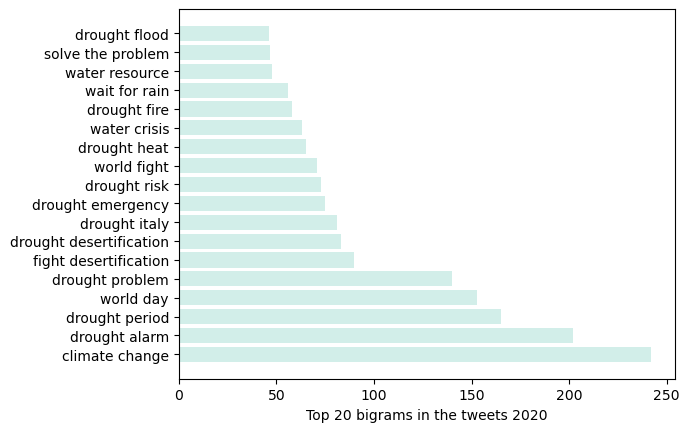

In [54]:
plt.barh(df_20['bigram'], df_20['count'],align='center', color='#d2eee9')
plt.xlabel('Top 20 bigrams in the tweets 2020')
plt.show()

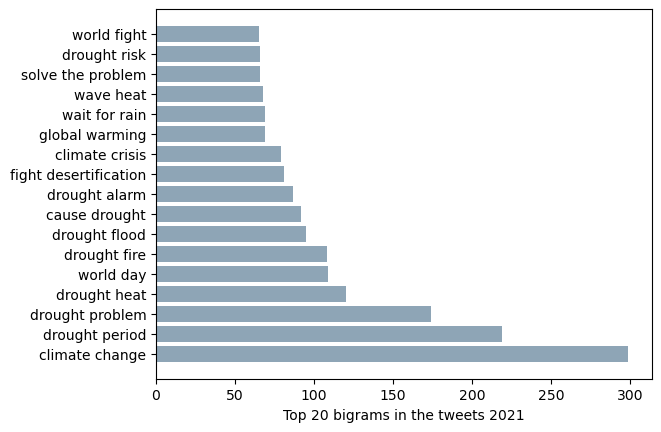

In [55]:
plt.barh(df_21['bigram'], df_21['count'],align='center', color='#8ea5b6')
plt.xlabel('Top 20 bigrams in the tweets 2021')
plt.show()

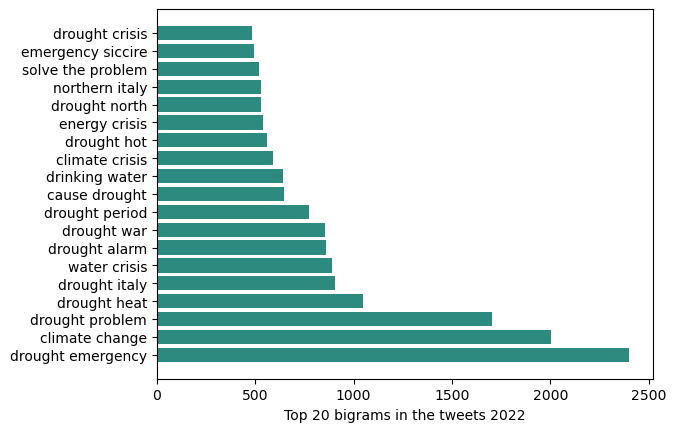

In [56]:
plt.barh(df_22['bigram'], df_22['count'],align='center', color='#2c8a7e')
plt.xlabel('Top 20 bigrams in the tweets 2022')
plt.show()

In [57]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
common_words_20 = get_top_n_trigram(df_clean_20['question_lemmatize_clean'], 10)
df_3_20 = pd.DataFrame(common_words_20, columns = ['trigram' , 'count'])

common_words_21 = get_top_n_trigram(df_clean_21['question_lemmatize_clean'], 10)
df_3_21 = pd.DataFrame(common_words_21, columns = ['trigram' , 'count'])

common_words_22 = get_top_n_trigram(df_clean_22['question_lemmatize_clean'], 10)
df_3_22 = pd.DataFrame(common_words_22, columns = ['trigram' , 'count'])

In [59]:
for i in range(len(df_3_20['trigram'])):
    df_3_20['trigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_3_20['trigram'].loc[i]).lower()
    
for i in range(len(df_3_21['trigram'])):
    df_3_21['trigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_3_21['trigram'].loc[i]).lower()
    
for i in range(len(df_3_22['trigram'])):
    df_3_22['trigram'].loc[i]=GoogleTranslator(source='auto', target='en').translate(df_3_22['trigram'].loc[i]).lower()

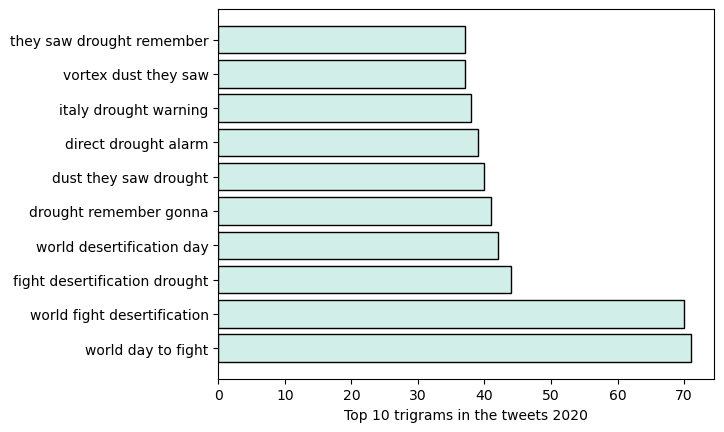

In [60]:
plt.barh(df_3_20['trigram'], df_3_20['count'],align='center', color='#d2eee9', edgecolor='black')
plt.xlabel('Top 10 trigrams in the tweets 2020')
plt.show()

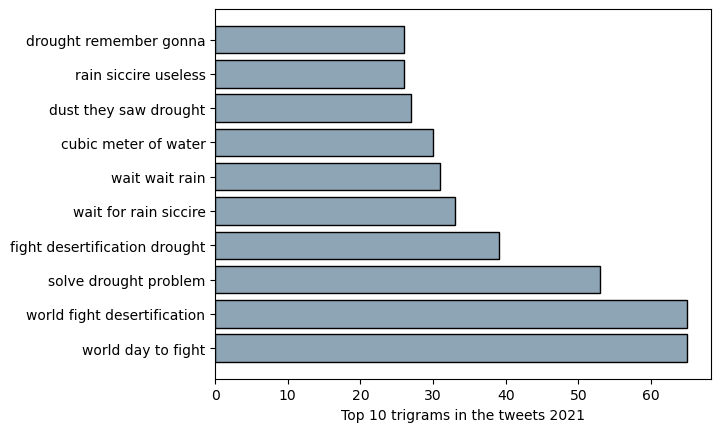

In [61]:
plt.barh(df_3_21['trigram'], df_3_21['count'],align='center', color='#8ea5b6', edgecolor='black')
plt.xlabel('Top 10 trigrams in the tweets 2021')
plt.show()

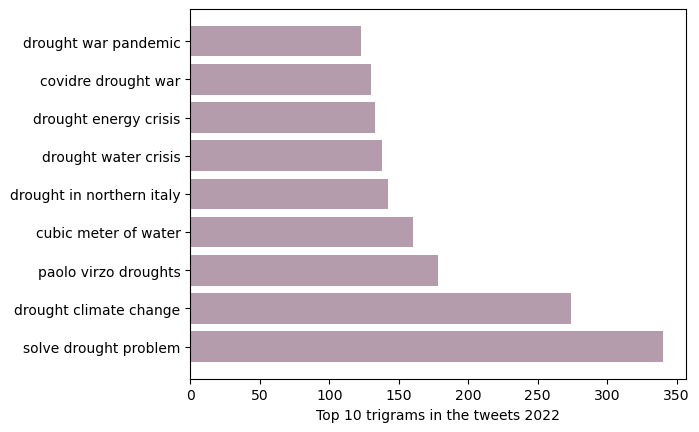

In [62]:
plt.barh(df_3_22['trigram'], df_3_22['count'],align='center', color='#b49cac')
plt.xlabel('Top 10 trigrams in the tweets 2022')
plt.show()